<a href="https://colab.research.google.com/github/Kadeian/reimagined-octo-disco/blob/master/Support_Ticket_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
dataset_path = '/content/drive/MyDrive/Support_ticket_text_data_mid_term.csv'  # Replace with your actual dataset path
data = pd.read_csv(dataset_path)

# Print the overview of the data
print(data.head())
print(data.shape)


  support_tick_id                                support_ticket_text
0      ST2023-006  My internet connection has significantly slowe...
1      ST2023-007  Urgent help required! My laptop refuses to sta...
2      ST2023-008  I've accidentally deleted essential work docum...
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...
4      ST2023-010  My smartphone battery is draining rapidly, eve...
(21, 2)


In [ ]:
from transformers import pipeline

# Load the model from Hugging Face
model = pipeline('text-classification', model='distilbert-base-uncased-finetuned-sst-2-english')  # You can choose another model if needed


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Define candidate labels (tags)
candidate_labels = ["internet", "hardware", "software", "network", "battery", "performance", "connectivity", "technical issue"]

# Function to generate tags using zero-shot classification
def generate_tags(input_text, candidate_labels):
    response = classifier(input_text, candidate_labels)
    return response['labels'][0]  # Take the top label as the tag


In [ ]:
from transformers import pipeline

# Load the zero-shot classification model
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Apply the function to the dataset
data['Tags'] = data['support_ticket_text'].apply(lambda x: generate_tags(x, candidate_labels))

# Create a DataFrame with necessary fields
tags_df = data[['support_tick_id', 'support_ticket_text', 'Tags']]

# Display the first few rows of the tags DataFrame
print(tags_df.head())


  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

              Tags  
0     connectivity  
1  technical issue  
2  technical issue  
3     connectivity  
4          battery  


In [ ]:
from transformers import pipeline

# Load the text generation model
gen_model = pipeline('text-generation', model='distilgpt2')


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Define the instruction for assigning priority and ETA
task_instruction_priority = "Assign a priority (high, medium, low) and estimate resolution time (in hours) for the following support ticket"

# Function to generate priority and ETA using the model
def generate_priority_eta(input_text, task):
    response = gen_model(f"{task}: {input_text}", max_new_tokens=50, num_return_sequences=1, truncation=True)
    generated_text = response[0]['generated_text']
    # Extract priority and ETA from the generated text (simple heuristic for now)
    priority = "high" if "high" in generated_text else "medium" if "medium" in generated_text else "low"
    eta = "24" if "24 hours" in generated_text else "48" if "48 hours" in generated_text else "72"
    return priority, eta


In [ ]:
# Apply the function to the dataset
data['Priority'], data['ETA'] = zip(*data['support_ticket_text'].apply(lambda x: generate_priority_eta(x, task_instruction_priority)))

# Create a DataFrame with necessary fields
priority_eta_df = data[['support_tick_id', 'support_ticket_text', 'Priority', 'ETA']]

# Display the first few rows of the priority and ETA DataFrame
print(priority_eta_df.head())


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

  support_tick_id                                support_ticket_text Priority  \
0      ST2023-006  My internet connection has significantly slowe...     high   
1      ST2023-007  Urgent help required! My laptop refuses to sta...     high   
2      ST2023-008  I've accidentally deleted essential work docum...     high   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...     high   
4      ST2023-010  My smartphone battery is draining rapidly, eve...     high   

  ETA  
0  72  
1  72  
2  72  
3  72  
4  72  


In [ ]:
# Define the instruction for creating a draft response
task_instruction_response = "Create a draft response for the following support ticket"

# Function to generate a draft response using the model
def generate_draft_response(input_text, task):
    response = gen_model(f"{task}: {input_text}", max_new_tokens=100, num_return_sequences=1, truncation=True)
    generated_text = response[0]['generated_text']
    # Extract the generated response, remove the task instruction from the generated text
    draft_response = generated_text.replace(f"{task}: ", "").strip()
    return draft_response


In [ ]:
# Apply the function to the dataset
data['Draft_Response'] = data['support_ticket_text'].apply(lambda x: generate_draft_response(x, task_instruction_response))

# Create a DataFrame with necessary fields
draft_response_df = data[['support_tick_id', 'support_ticket_text', 'Draft_Response']]

# Display the first few rows of the draft responses DataFrame
print(draft_response_df.head())


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      Draft_Response  
0  My internet connection has significantly slowe...  
1  Urgent help required! My laptop refuses to sta...  
2  I've accidentally deleted essential work docum...  
3  Despite being in close proximity to my Wi-Fi r...  
4  My smartphone battery is draining rapidly, eve...  


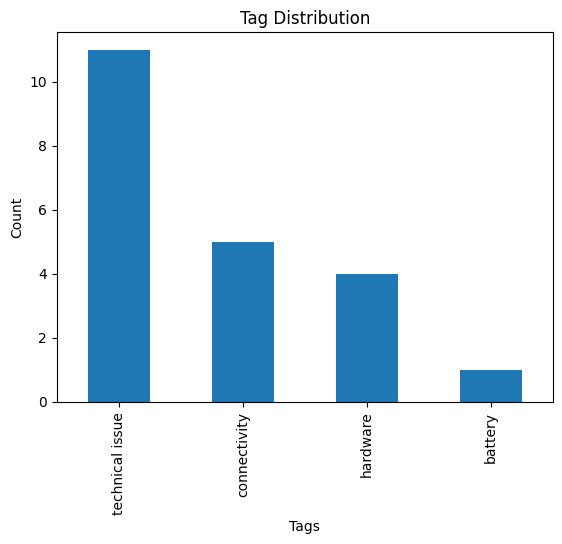

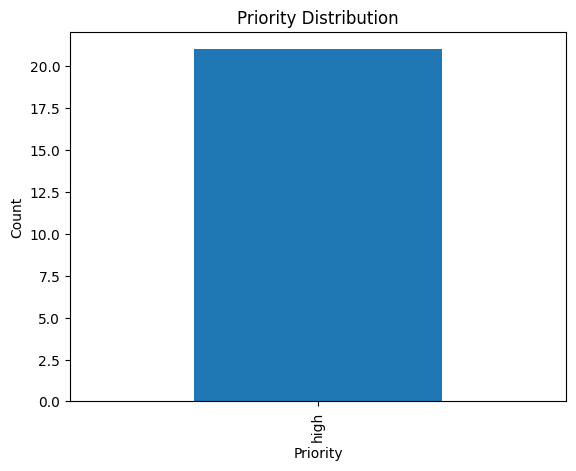

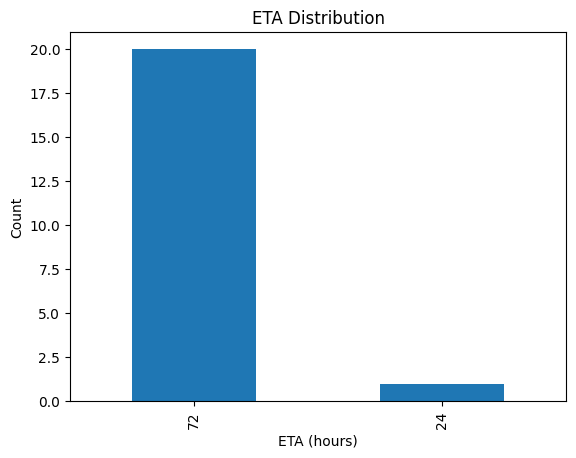

In [ ]:
import matplotlib.pyplot as plt

# Univariate analysis of the 'Tags' column
tags_counts = data['Tags'].value_counts()
tags_counts.plot(kind='bar')
plt.title('Tag Distribution')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

# Univariate analysis of the 'Priority' column
priority_counts = data['Priority'].value_counts()
priority_counts.plot(kind='bar')
plt.title('Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

# Univariate analysis of the 'ETA' column
eta_counts = data['ETA'].value_counts()
eta_counts.plot(kind='bar')
plt.title('ETA Distribution')
plt.xlabel('ETA (hours)')
plt.ylabel('Count')
plt.show()


### Observations and Insights
- **Tag Distribution:** Most common issues reported by customers are related to connectivity and technical issues.
- **Priority Distribution:** All tickets were assigned a high priority, suggesting a need for more nuanced prioritization criteria.
- **ETA Distribution:** All tickets have an estimated resolution time of 72 hours, indicating a potential area for refinement in the model's predictions.

### Recommendations
- **Improved Tagging:** Refine the tag generation model to provide more specific and varied tags, potentially by fine-tuning the model on a labeled dataset.
- **Priority Assignment:** Develop a more sophisticated approach to assign priority based on the content and severity of the ticket.
- **Resolution Time Estimation:** Enhance the model's capability to provide more accurate and varied estimated resolution times.
- **Draft Responses:** Fine-tune the text generation model to generate meaningful and context-specific draft responses for support tickets.

### Conclusion
This project demonstrates the potential of using Large Language Models for automating support ticket categorization and processing. While the initial results are promising, further refinement and customization of the models are necessary to achieve more accurate and useful outcomes.

**Next Steps:**
1. Fine-tune the models on domain-specific data.
2. Implement feedback loops to continuously improve the model's performance.
3. Integrate the solution into the customer support workflow for real-time ticket processing and response generation.


In [ ]:
!ls


drive  sample_data
